# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_data = []

for city in cities:
    # Requests city data
    url = "https://api.openweathermap.org/data/2.5/weather?q=%s&appid=%s&units=imperial" % (city, weather_api_key)
    response = requests.get(url)
    loaded_data = json.loads(response.text)
    
    # Loads city data with successful response
    if response.status_code == 200:
        print("Loading data for city #%s %s" % (cities.index(city), city))
        data = [
            city,
            loaded_data['clouds']['all'],
            loaded_data['sys']['country'],
            loaded_data['dt'],
            loaded_data['main']['humidity'],
            loaded_data['coord']['lat'],
            loaded_data['coord']['lon'],
            loaded_data['main']['temp_max'],
            loaded_data['wind']['speed']
        ]
        city_data.append(data)
    else:
        print("Could not find city.")


Loading data for city #0 nikolskoye
Loading data for city #1 comendador
Loading data for city #2 santa catalina
Loading data for city #3 saint-joseph
Loading data for city #4 bourail
Loading data for city #5 jacqueville
Loading data for city #6 hilo
Loading data for city #7 cherskiy
Loading data for city #8 leningradskiy
Loading data for city #9 henties bay
Loading data for city #10 moose factory
Loading data for city #11 hobart
Loading data for city #12 komsomolskiy
Loading data for city #13 atuona
Loading data for city #14 grindavik
Loading data for city #15 mataura
Loading data for city #16 aguas vermelhas
Loading data for city #17 ludvika
Loading data for city #18 laguna
Loading data for city #19 sarai alamgir
Loading data for city #20 caravelas
Loading data for city #21 srivardhan
Loading data for city #22 albany
Loading data for city #23 vaini
Loading data for city #24 sunrise manor
Loading data for city #25 haldibari
Loading data for city #26 bukene
Loading data for city #27 kai

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating data frame with city weather data
city_dataframe = pd.DataFrame(data=city_data, columns=['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed'])

# Outputing data frame to csv file
city_dataframe.to_csv(output_data_file)

city_dataframe.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,nikolskoye,4,RU,1633552210,67,59.7035,30.7861,52.88,11.12
1,comendador,100,DO,1633552211,64,18.8775,-71.7028,84.02,4.45
2,santa catalina,83,PH,1633552216,87,9.3337,122.8637,77.86,2.62
3,saint-joseph,18,RE,1633551789,80,-21.3667,55.6167,68.38,3.69
4,bourail,50,NC,1633552216,68,-21.5667,165.4833,73.17,9.42


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

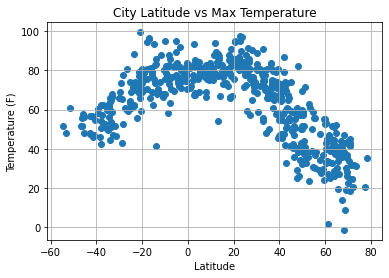

In [15]:
# Plotting data points
plt.scatter(city_dataframe['Lat'], city_dataframe['Max Temp'])

# Labeling Plot
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()

# Saving Plot
plt.savefig('figures/LatitudeVsTemperature.png')

plt.show()

#### Latitude vs. Humidity Plot

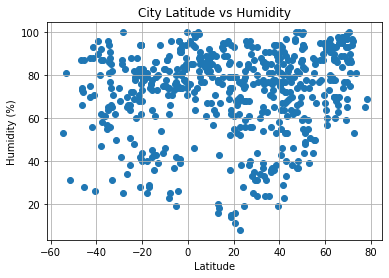

In [16]:
# Plotting data points
plt.scatter(city_dataframe['Lat'], city_dataframe['Humidity'])

# Labeling Plot
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Saving Plot
plt.savefig('figures/LatitudeVsHumidity.png')

plt.show()

#### Latitude vs. Cloudiness Plot

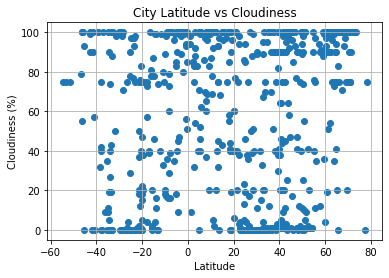

In [17]:
# Plotting data points
plt.scatter(city_dataframe['Lat'], city_dataframe['Cloudiness'])

# Labeling Plot
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Saving Plot
plt.savefig('figures/LatitudeVsCloudiness.png')

plt.show()

#### Latitude vs. Wind Speed Plot

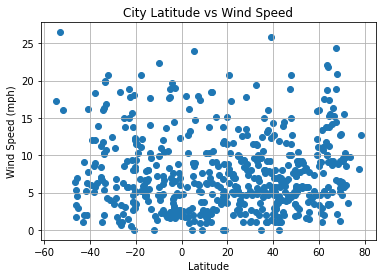

In [18]:
# Plotting data points
plt.scatter(city_dataframe['Lat'], city_dataframe['Wind Speed'])

# Labeling Plot
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# Saving Plot
plt.savefig('figures/LatitudeVsWindSpeed.png')

plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


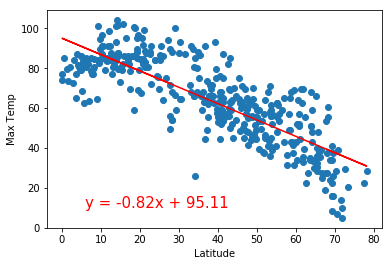

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


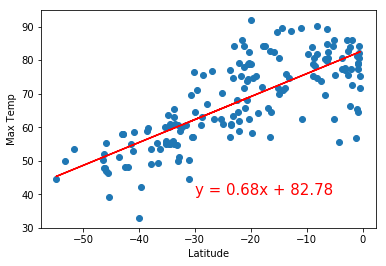

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


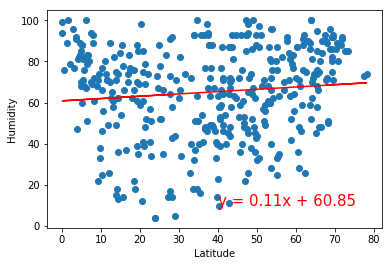

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


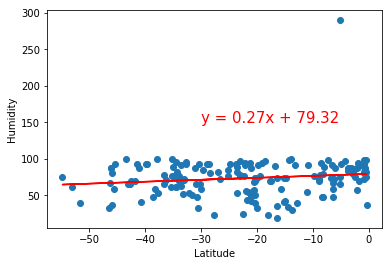

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


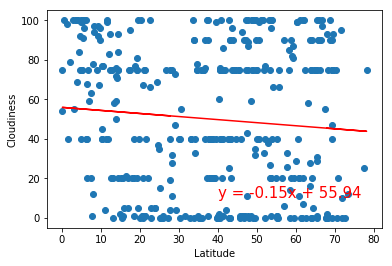

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


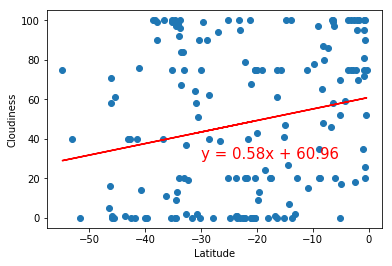

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


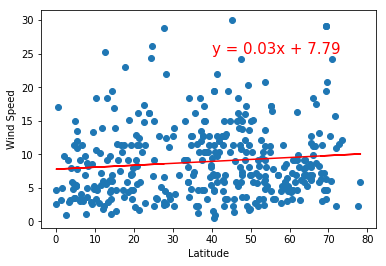

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


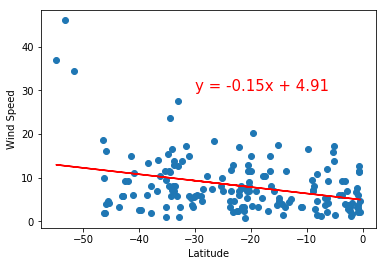